In [1]:
import pandas
import datetime
import numpy
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.dates import DateFormatter,\
             HourLocator, MinuteLocator
%matplotlib inline

In [2]:
# setup some cutoff values we'll use in the analysis
velCutoffUpper = 2000.
velCutoffLower = 0.
numPointsCutoffMLTMLAT = 250
mlatCutOffUpper = 70.

In [3]:
#### In this block we load Velocity data ####
#### In this block we load Velocity data ####
#### In this block we load Velocity data ####
# a helper function to convert seperate date
# and time strings to datetime objects
def convert_to_datetime(row):
        # Given a datestr and a time string convert to a python datetime obj.
        import datetime
        datecolName="dtStr"
        timeColName="tmStr"
        currDateStr = str( int( row[datecolName] ) )
    #     return currDateStr
        if row[timeColName] < 10:
            currTimeStr = "000" + str( int( row[timeColName] ) )
        elif row[timeColName] < 100:
            currTimeStr = "00" + str( int( row[timeColName] ) )
        elif row[timeColName] < 1000:
            currTimeStr = "0" + str( int( row[timeColName] ) )
        else:
            currTimeStr = str( int( row[timeColName] ) )
        return datetime.datetime.strptime( currDateStr\
                        + ":" + currTimeStr, "%Y%m%d:%H%M" )
    
fitVelFile = "../data/fitted_vels_jun22.txt"
inpColNames = ["normMLT", "MLAT", "vSaps", "azim",\
                     "vMagnErr", "azimErr", "dtStr", "tmStr"]
velsDataDF = pandas.read_csv(fitVelFile, sep=' ',\
                             header=None, names=inpColNames)
velsDataDF["date"] = velsDataDF.apply( convert_to_datetime, axis=1 )
velsDataDF["dtStr"] = velsDataDF["dtStr"].astype("str")
# Discard unwanted values
# We'll only consider those velocities 
# which lie between 0 and 2500 m/s
# and located below 70 MLAT
velsDataDF = velsDataDF[ (velsDataDF["vSaps"] > velCutoffLower) \
                        & (velsDataDF["vSaps"] < velCutoffUpper)\
                       ].reset_index(drop=True)
velsDataDF = velsDataDF[ velsDataDF["MLAT"] < mlatCutOffUpper ].reset_index(drop=True)
velsDataDF["hour"] = velsDataDF["date"].apply(lambda x: x.strftime('%H'))
velsDataDF["minute"] = velsDataDF["date"].apply(lambda x: x.strftime('%M'))
velsDataDF.head()
#### In this block we load Velocity data ####
#### In this block we load Velocity data ####
#### In this block we load Velocity data ####

,normMLT,MLAT,vSaps,azim,vMagnErr,azimErr,dtStr,tmStr,date,hour,minute
0,-3.0,50.5,91.77,-15.47,8.75,43.97,20130622,500,2013-06-22 05:00:00,05,00
1,-2.0,50.5,91.77,-15.47,8.75,43.97,20130622,500,2013-06-22 05:00:00,05,00
2,-3.0,52.5,67.97,-15.69,1.05,6.78,20130622,500,2013-06-22 05:00:00,05,00
3,-2.0,52.5,67.97,-15.69,1.05,6.78,20130622,500,2013-06-22 05:00:00,05,00
4,-4.0,53.0,66.25,-14.00,2.06,14.58,20130622,500,2013-06-22 05:00:00,05,00


In [8]:
# RBSP A was near 23 MLT for some time and near 0 MLT for the remaining
# Only limit the velocities to the mlts
velsDataDF23 = velsDataDF[ velsDataDF["normMLT"] == -1. ].reset_index(drop=True)
velsDataDF23 = velsDataDF23[ (velsDataDF23["MLAT"] >= 60.) & (velsDataDF23["MLAT"] <= 63.) ]
velsDataDF0 = velsDataDF[ velsDataDF["normMLT"] == 0. ].reset_index(drop=True)
velsDataDF0 = velsDataDF0[ (velsDataDF0["MLAT"] >= 60.) & (velsDataDF0["MLAT"] <= 63.) ]

velsDataDF23["MLAT"].unique()

array([ 60.5,  61. ,  61.5,  60. ,  62. ,  62.5,  63. ])

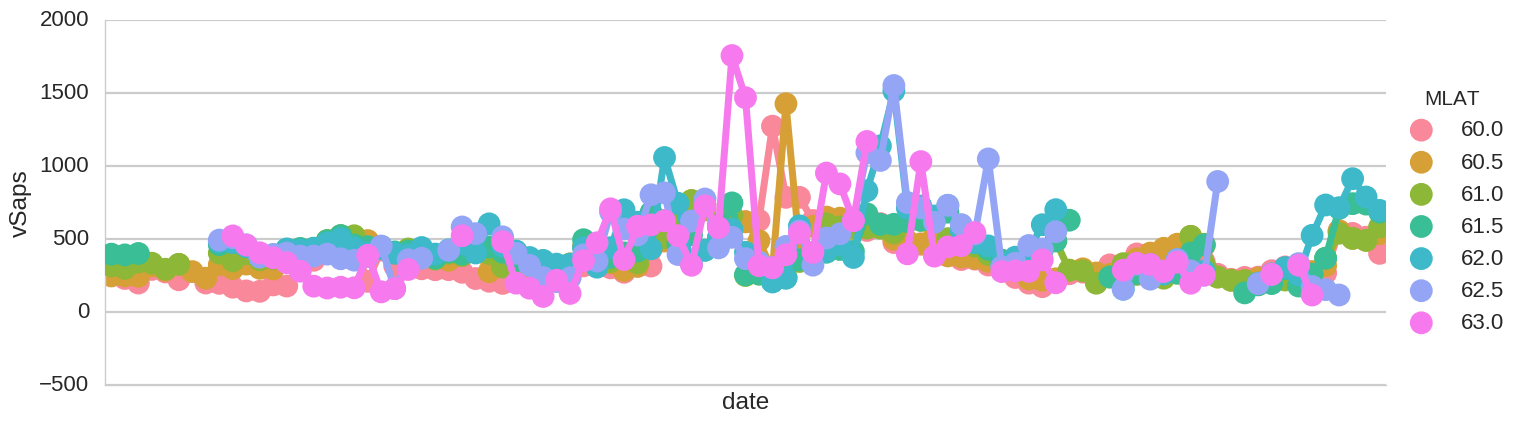

In [20]:
sns.set_style("whitegrid")
sns.set_context("poster")
latVels23Fig = sns.factorplot(x="date", y="vSaps", hue="MLAT", \
                    data=velsDataDF23, size=5, aspect=3,\
                   legend_out=True, kind="point")
# latVels23Fig.ax.set_xlim( [ datetime.datetime(2013,6,22,5,0), datetime.datetime(2013,6,22,7,0) ] )
# format the x tick marks
latVels23Fig.ax.xaxis.set_major_formatter(DateFormatter('%H%M'))
# ax.xaxis.set_minor_formatter(DateFormatter('\n%M'))
latVels23Fig.ax.xaxis.set_major_locator(MinuteLocator(interval=10))

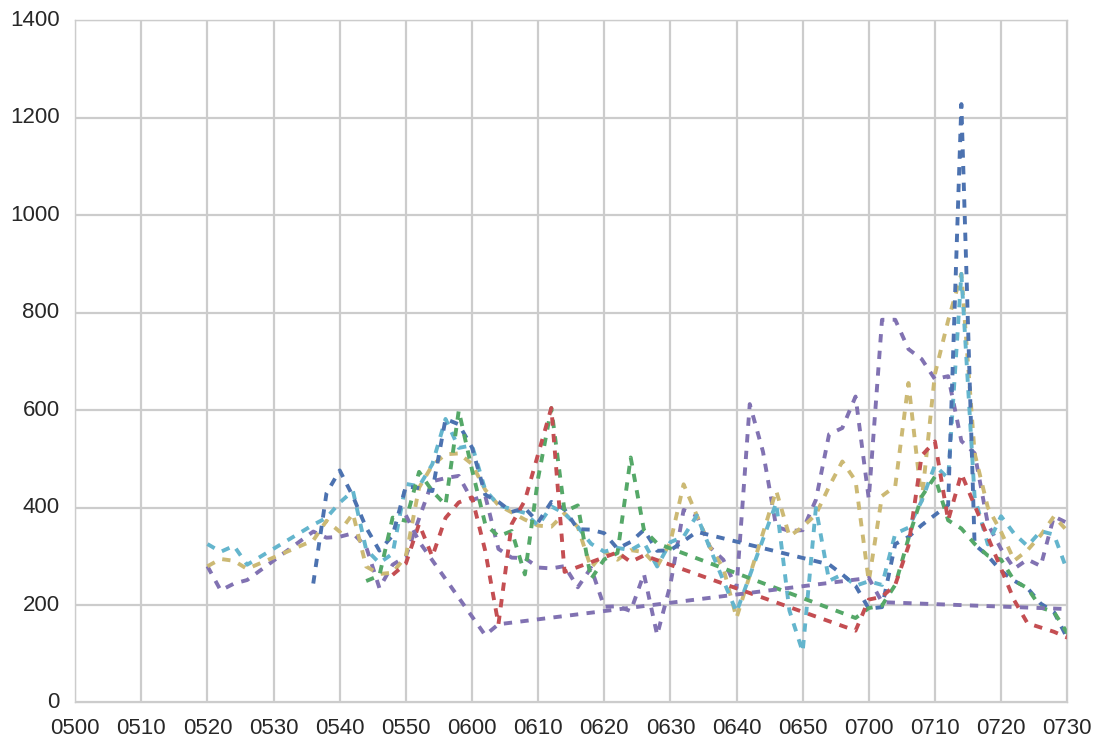

In [44]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)


strtLat = 55.
endLat = 63.
while strtLat <= endLat:
#     print strtLat
    strtLat = strtLat + 0.5
    currMLATDF = velsDataDF0[ velsDataDF0["MLAT"] == strtLat ]
    ax.plot_date( currMLATDF['date'], currMLATDF['vSaps'], '--')
    ax.set_xlim( [ datetime.datetime(2013,6,22,5,0), datetime.datetime(2013,6,22,7,30) ] )
    ax.xaxis.set_major_formatter(DateFormatter('%H%M'))
    ax.xaxis.set_major_locator(MinuteLocator(interval=10))

In [17]:
gammas = sns.load_dataset("gammas")
gammas.head()

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992
